Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.5 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

Mean Squared Error: 86.0711681772938
R^2 Score: 0.5972486429071335


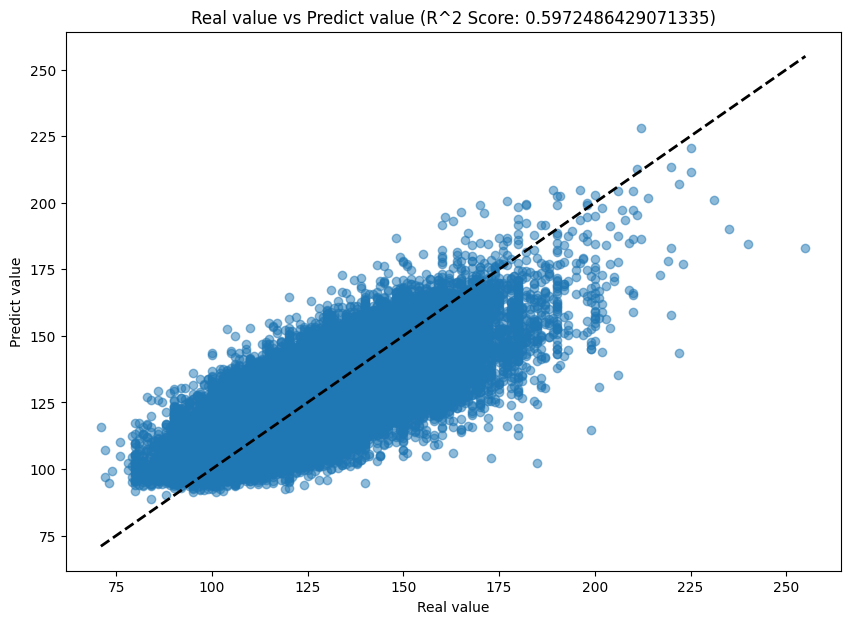

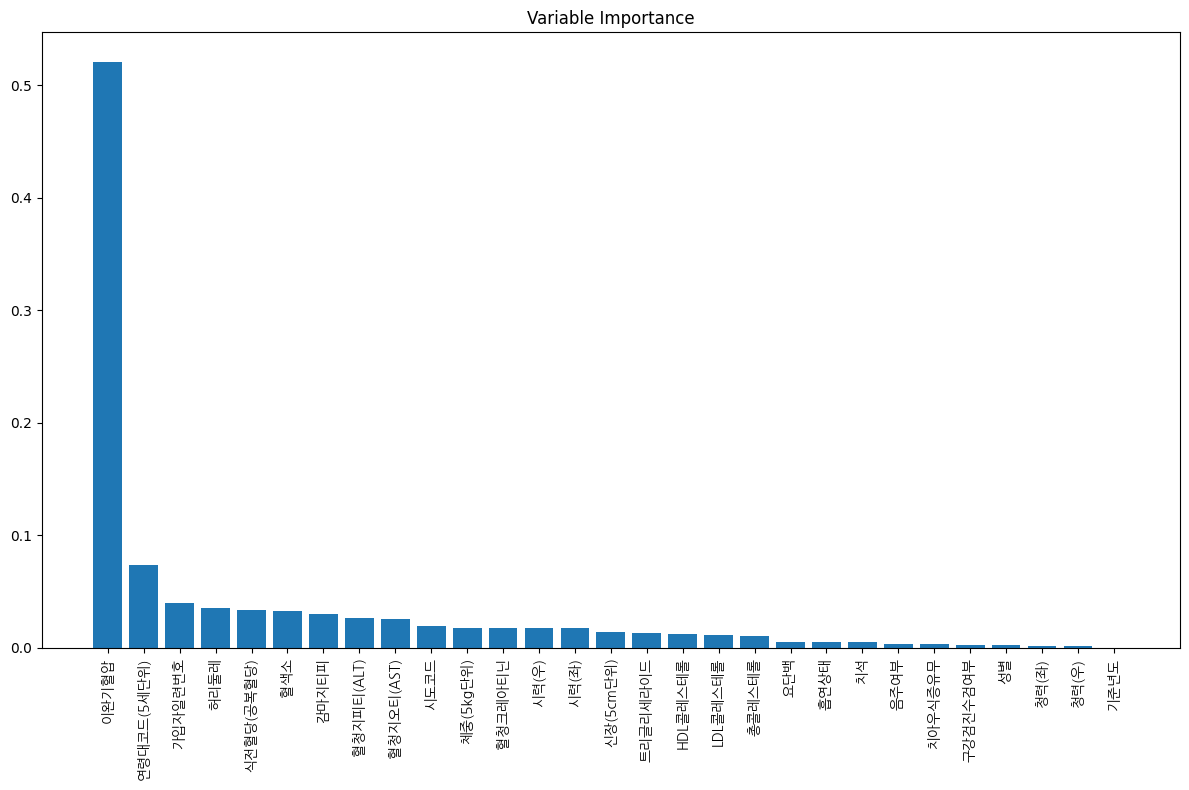

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from google.colab import drive
from tabulate import tabulate

# 한글 폰트 설정
import matplotlib.font_manager as fm
import matplotlib as mpl

# Colab 환경에서 나눔 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
mpl.rc('font', family='NanumGothic')

# Google Drive 마운트
drive.mount('/content/drive')

# 데이터 불러오기
file_path = '/content/drive/MyDrive/HAS_FINAL/health_data.CSV'
data = pd.read_csv(file_path, encoding='cp949')  # 한국어 인코딩 지정

# 데이터셋의 첫 몇 행을 표 형태로 출력하여 열 이름 확인
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

# 열 이름 출력
print("Columns in the dataset:")
print(data.columns)

# 목표 열 이름 설정 (예: '수축기혈압')
target_column = '수축기혈압'  # 실제 목표 열 이름으로 변경

# 열 이름 확인
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in data columns")

# 데이터 전처리
# 결측값 처리
data.fillna(data.mean(), inplace=True)

# 범주형 변수를 수치형으로 변환
data = pd.get_dummies(data)

# 특징과 타겟 변수로 데이터 분할
X = data.drop(target_column, axis=1)
y = data[target_column]

# 학습 및 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 시각화: 실제 값 vs 예측 값
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.title(f'Real value vs Predict value (R^2 Score: {r2})')
plt.show()

# 중요 변수 시각화
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
plt.title('Variable Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90, fontproperties=fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'))
plt.tight_layout()
plt.show()
